In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
INPUTNO = 2
HIDDENNO = 3
ALPHA = 0.1
LIMIT = 0.1
np.random.seed(64)

In [3]:
# sigmoid function
def sigmoid(u):
    return 1 / (1 + np.exp(-u))

In [5]:
# forward network
def forward(x, hi, wh, wo):
    # Input -> Hidden
    for i in range(HIDDENNO):
        u = np.dot(x, wh[i, :-1]) + wh[i, -1]
        u -= wh[i, -1]
        hi[i] = sigmoid(u)
    
    # Hidden -> Output
    o = np.dot(hi, wo[:-1]) + wo[-1]
    o -= wo[-1]
    
    return sigmoid(o)

In [6]:
def olearn(hi, wo, o, t):
    # Update weights: HIDDEN <- OUTPUT
    d = (t - o) * o * (1 - o)
    for i in range(HIDDENNO):
        wo[i] += ALPHA * d * hi[i]
    
    # bias
    wo[-1] += ALPHA * d *(-1)
    
    return

In [7]:
def hlearn(x, hi, wh, wo, o, t):
    # Update weights: INPUT <- HIDDEN
    for i in range(HIDDENNO):
        d = hi[i] * (1 - hi[i]) * wo[i] * (t - o) * o * (1 - o)
        
        for j in range(INPUTNO):
            wh[i, j] += ALPHA * x[j] * d
        
        # bias
        wh[i, -1] += ALPHA * d *(-1)
    return

In [65]:
# data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = t = np.array([0, 1, 1, 1])
# initialize hidden layer units and weights
hi = np.zeros(HIDDENNO)
wh = np.random.uniform(-1, 1, [INPUTNO+1, HIDDENNO])
wo = np.random.uniform(-1, 1, [HIDDENNO+1, 1])

In [66]:
# Learning
epoch = 0
err = 100
plot_err = []

while err > LIMIT:

    err = 0
    for i in range(len(x)):
        o = forward(x[i], hi, wh, wo)
        olearn(hi, wo, o, t[i])
        hlearn(x[i], hi, wh, wo, o, t[i])
        err += (o-t[i]) * (o-t[i]) 
    
    plot_err.append(err)
    epoch += 1
    
    if epoch % 1000 == 0:
        print(epoch, err)
    
    if epoch == 10000:
        break

1000 [0.34702873]


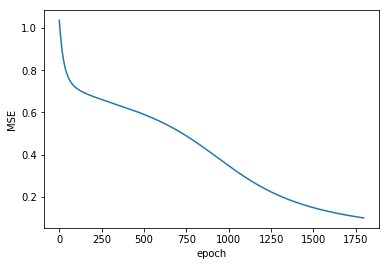

In [67]:
# MSE graph
plt.plot(plot_err)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

In [68]:
for i in range(len(x)):
    print(x[i], '>', forward(x[i], hi, wh, wo))

[0 0] > [0.25497167]
[0 1] > [0.87131741]
[1 0] > [0.87873574]
[1 1] > [0.94182868]
